In [ ]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import sklearn.linear_model, sklearn.datasets
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures # We will be using the inbuilt preprocessing functions sklearn provides
from sklearn.model_selection import train_test_split # A library that can automatically perform data splitting for us
from sklearn.linear_model import Ridge, Lasso # Ridge & Lasso regression are types of linear model that use regularisation
from sklearn.metrics import mean_squared_error # Allows us to use the MSE function without calling in sklearn each time
 # We will be importing a csv file I have provided for one section.

In [ ]:
import time
start = time.time()
from google.colab import files

uploaded = files.upload()  
end = time.time()
print('Execution time:', (end-start), 'seconds')

Saving autoscout24_germany_dataset.csv to autoscout24_germany_dataset.csv
Execution time: 45.50299835205078 seconds


In [ ]:
car_csv = pd.read_csv('autoscout24_germany_dataset.csv')
df = pd.DataFrame(data= car_csv) #created a dataframe
# show the data
df.head(10)

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.0,2011
6,91894,Renault,Scenic,Diesel,Manual,Used,6970,131.0,2011
7,127500,Opel,Zafira,Gasoline,Manual,Used,6972,116.0,2011
8,115000,Mazda,3,Gasoline,Automatic,Used,6980,150.0,2011
9,104,Ford,Transit,Diesel,Manual,Used,6990,86.0,2011


In [ ]:
df.info

<bound method DataFrame.info of        mileage        make   model               fuel    gear       offerType  \
0       235000         BMW     316             Diesel  Manual            Used   
1        92800  Volkswagen    Golf           Gasoline  Manual            Used   
2       149300        SEAT    Exeo           Gasoline  Manual            Used   
3        96200     Renault  Megane           Gasoline  Manual            Used   
4       156000     Peugeot     308           Gasoline  Manual            Used   
...        ...         ...     ...                ...     ...             ...   
46400       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46401       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46402       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46403       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46404       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered

In [ ]:
df.describe()

,mileage,price,hp,year
count,4.640500e+04,4.640500e+04,46376.000000,46405.000000
mean,7.117786e+04,1.657234e+04,132.990987,2016.012951
std,6.262531e+04,1.930470e+04,75.449284,3.155214
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.980000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.099900e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


In [ ]:
df['price'].agg(['min', 'max'])

min       1100
max    1199900
Name: price, dtype: int64

In [ ]:
df['hp'].agg(['min', 'max'])

min      1.0
max    850.0
Name: hp, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


Text(0.5, 1.0, 'Fuel')

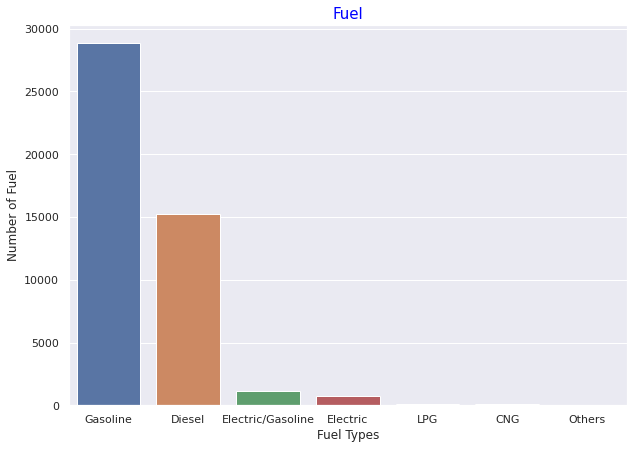

In [ ]:
fuel = df.fuel.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=fuel[:7].index,y=fuel[:7].values)
plt.ylabel('Number of Fuel')
plt.xlabel('Fuel Types')
plt.title('Fuel',color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Number of Offer Type')

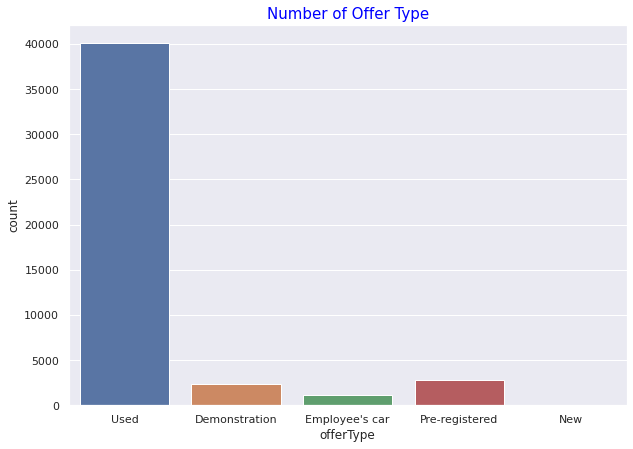

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='offerType')
plt.title('Number of Offer Type',color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Number of Makes')

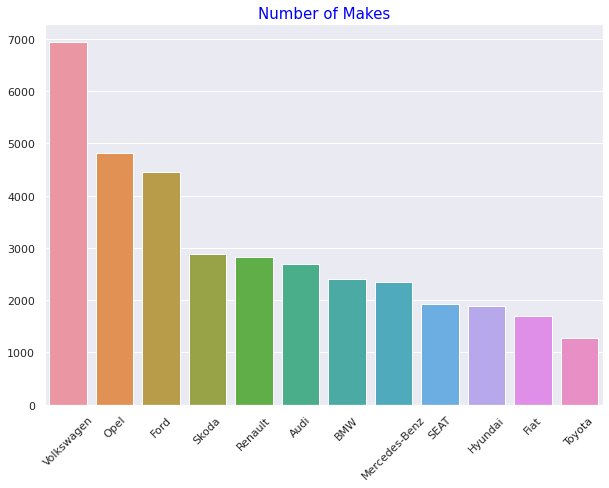

In [ ]:
make = df.make.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=make[:12].index,y=make[:12].values)
plt.xticks(rotation=45)
plt.title('Number of Makes',color = 'blue',fontsize=15)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Cars on Years')

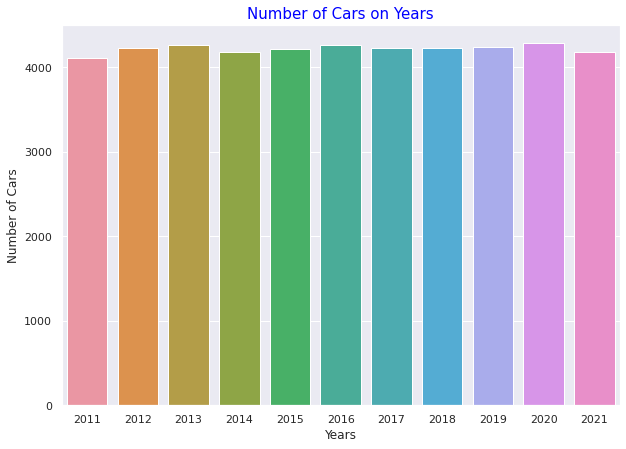

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(df.year)
plt.xlabel('Years')
plt.ylabel('Number of Cars')
plt.title('Number of Cars on Years',color = 'blue', fontsize = 15)

Text(0.5, 1.0, 'Car Make and HP')

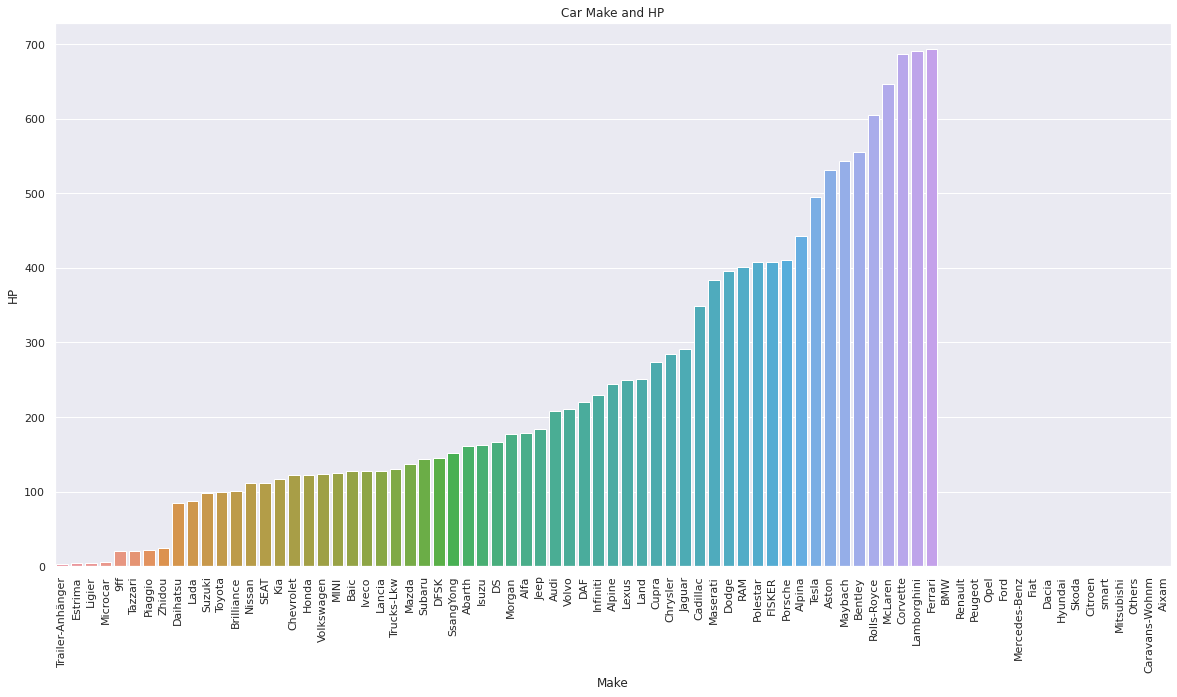

In [ ]:
make_list = list(df['make'].unique())
hp = []
for i in make_list:
    x = df[df['make']==i]
    hp_rate = sum(x.hp)/len(x)
    hp.append(hp_rate)
# sorting
data = pd.DataFrame({'make_list': make_list,'hp':hp})
new_index = (data['hp'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)
# visualization
plt.figure(figsize=(20,10))
sns.barplot(x=sorted_data2['make_list'], y=sorted_data2['hp'])
plt.xticks(rotation= 90)
plt.xlabel('Make')
plt.ylabel('HP')
plt.title("Car Make and HP")

Text(0.5, 1.0, 'Number of Gear Type')

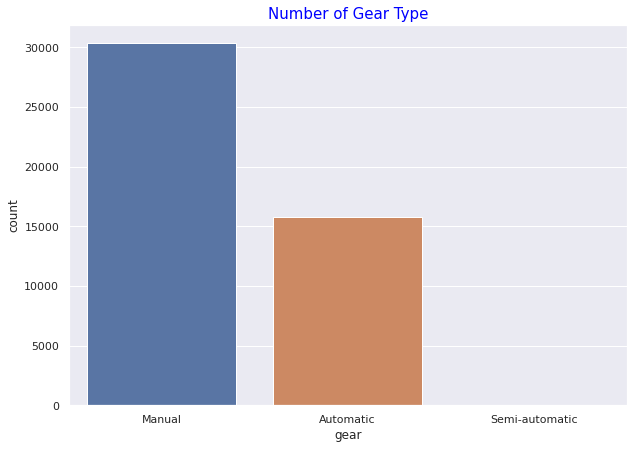

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='gear')
plt.title('Number of Gear Type',color = 'blue',fontsize=15)

In [ ]:
df.isnull().values.any()

True

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        0
hp           0
year         0
dtype: int64

In [ ]:
df.shape[0]
df = df.drop_duplicates(keep='first')
df.shape[0]

43947

In [ ]:
df.drop('year', axis=1, inplace=True)

df.head()

,mileage,make,model,fuel,gear,offerType,price,hp
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43947 entries, 0 to 46399
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    43947 non-null  int64  
 1   make       43947 non-null  object 
 2   model      43947 non-null  object 
 3   fuel       43947 non-null  object 
 4   gear       43947 non-null  object 
 5   offerType  43947 non-null  object 
 6   price      43947 non-null  int64  
 7   hp         43947 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 3.0+ MB


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[["make","model","fuel","gear", "offerType"]] = enc.fit_transform(df[["make","model","fuel","gear", "offerType"]])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43947 entries, 0 to 46399
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    43947 non-null  int64  
 1   make       43947 non-null  float64
 2   model      43947 non-null  float64
 3   fuel       43947 non-null  float64
 4   gear       43947 non-null  float64
 5   offerType  43947 non-null  float64
 6   price      43947 non-null  int64  
 7   hp         43947 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 3.0 MB
